In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
data=pd.read_csv('ramen-ratings.csv')
data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


# EDA

<AxesSubplot:>

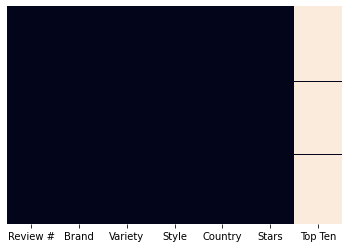

In [36]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [38]:
data.shape

(2580, 7)

In [39]:
data['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar', nan],
      dtype=object)

In [40]:
data['Style'].describe()

count     2578
unique       7
top       Pack
freq      1531
Name: Style, dtype: object

## Top preferred Ramens style.

<AxesSubplot:xlabel='Style', ylabel='count'>

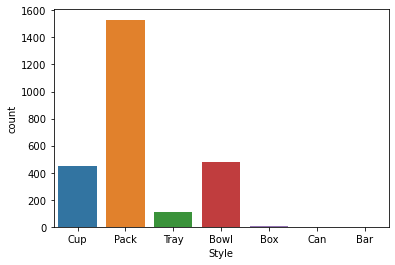

In [41]:
sns.countplot(x='Style', data=data)

Here : Pack ramens are mostly preferred.

## Top consumer of ramens

<AxesSubplot:xlabel='count', ylabel='Country'>

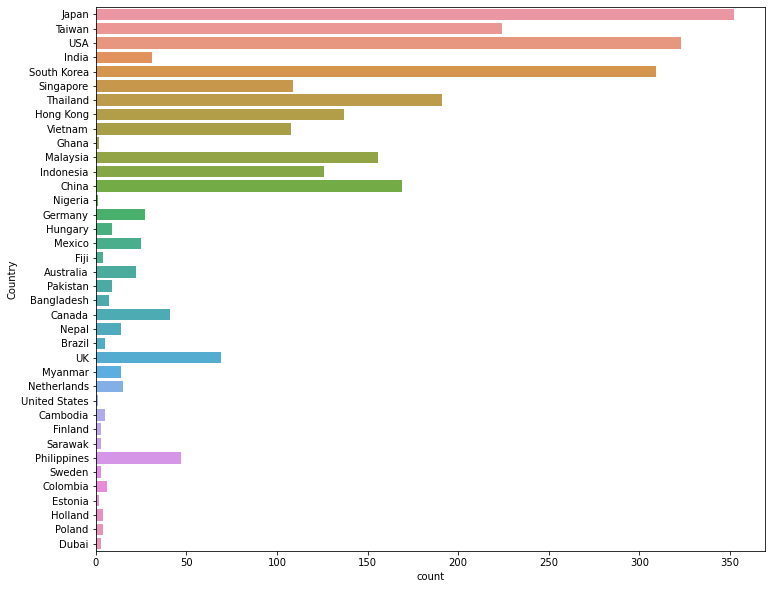

In [42]:
plt.figure(figsize=(12,10))
sns.countplot(y='Country',data=data)

Here:  Japan consumes the ramen most.

In [61]:
data.drop('Top Ten', axis=1, inplace=True) #found out it mostly consist of NAN values

KeyError: "['Top Ten'] not found in axis"

## Top ramen brand 

<AxesSubplot:>

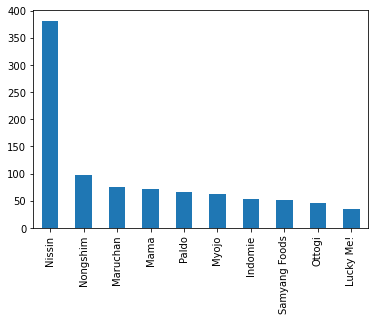

In [56]:
data['Brand'].value_counts().head(10).plot(kind='bar')

Here: Nissin is highly consumed.

## Top varieties of ramen

<AxesSubplot:>

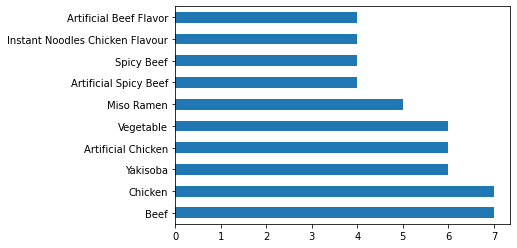

In [60]:
data['Variety'].value_counts().head(10).plot(kind='barh')

Here :  Beef and Chicken are mostly available.

## Handling missing values

In [68]:
data.isnull().sum()

Review #    0
Brand       0
Variety     0
Style       2
Country     0
Stars       0
dtype: int64

In [78]:
data[data['Style'].isnull()]

,Review #,Brand,Variety,Style,Country,Stars
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3


In [83]:
data[(data['Brand']=='Kamfen') & (data['Country']=='China')]['Style'].value_counts()

Pack    4
Tray    3
Name: Style, dtype: int64

In [84]:
data[(data['Brand']=='Unif') & (data['Country']=='Taiwan')]['Style'].value_counts()

Bowl    7
Pack    3
Name: Style, dtype: int64

In [95]:
data.loc[2152,'Style']='Pack'

In [97]:
data.loc[2442,'Style']='Bowl'

In [102]:
data['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [103]:
data[data['Stars']=='Unrated']

,Review #,Brand,Variety,Style,Country,Stars
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated


In [106]:
data[(data['Brand']=='Ottogi')&(data['Country']=='South Korea')]['Stars'].value_counts()

3.5        9
3.75       6
3.25       5
4.25       4
4          4
3          3
2.75       2
1.1        2
Unrated    1
2          1
5          1
1          1
4.5        1
1.75       1
2.8        1
Name: Stars, dtype: int64

In [107]:
data[(data['Brand']=='Samyang Foods')&(data['Country']=='South Korea')]['Stars'].value_counts()

4          13
3.75       11
5           9
4.25        5
4.5         4
3.5         4
4.75        2
Unrated     1
0           1
Name: Stars, dtype: int64

In [108]:
data[(data['Brand']=='Mi E-Zee')&(data['Country']=='Malaysia')]['Stars'].value_counts()

3.5        2
3.75       1
Unrated    1
4          1
Name: Stars, dtype: int64

In [109]:
data.loc[32,'Stars']=3.5

In [110]:
data.loc[122,'Stars']=4

In [111]:
data.loc[993,'Stars']=3.5

In [115]:
data['Stars']=data['Stars'].astype(float)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2580 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2580 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 121.1+ KB


### Top rated brands 

In [164]:
data_brand_top_rated=data.groupby('Brand', as_index=False)['Stars'].median()
top_rated_brands=data_brand_top_rated.sort_values(['Stars'], ascending=False).head(10)
top_rated_brands

,Brand,Stars
135,Komforte Chockolates,5.0
181,MyKuali,5.0
40,ChoripDong,5.0
47,Daddy,5.0
48,Daifuku,5.0
67,Foodmon,5.0
99,Higashi,5.0
117,Jackpot Teriyaki,5.0
126,Kiki Noodle,5.0
129,Kimura,5.0


### Low rated brands

In [163]:
low_rated_brands=data_brand_top_rated.sort_values(['Stars'], ascending=False).tail(10)
low_rated_brands

,Brand,Stars
187,Nan Hsing,0.25
173,Mitoku,0.25
45,Crystal Noodle,0.25
103,Hsin Tung Yang,0.00
316,US Canning,0.00
203,One Dish Asia,0.00
127,Kim Ve Wong,0.00
235,Roland,0.00
54,Dr. McDougall's,0.00
305,Tiger,0.00


### Top rated variety in ramen

In [160]:
top_rated_variety=data.groupby('Variety', as_index=False)['Stars'].median()
top_rated_variety=top_rated_variety.sort_values(['Stars'], ascending=False).head(10)
top_rated_variety

,Variety,Stars
1206,Malaysia Penang White Curry Noodle Original,5.0
260,Buldak Bokkeummyun Snack,5.0
1764,Red Nagasaki Jjampong,5.0
665,Dry Noodle Mandarin Noodle - Onion Oil Sauce,5.0
2095,Spicy Tonkotsu Noodle Soup,5.0
667,Dry Noodle QQ Thin Noodle - BBQ Sauce,5.0
1759,Rasa Soto Banjar Limau Kulit,5.0
1756,Rasa Kari Ayam Medan,5.0
675,Emergency Chikin Ramen Cup Noodle,5.0
678,Emporer Instant Noodles Spicy Chicken,5.0


### Low rated variety in ramen

In [161]:
low_rated_variety=data.groupby('Variety', as_index=False)['Stars'].median()
low_rated_variety=low_rated_variety.sort_values(['Stars'], ascending=False).tail(10)
low_rated_variety

,Variety,Stars
1098,Kimchee Noodle Soup,0.0
823,Hot & Sour Casserole Stewed Rice Noodle,0.0
824,Hot & Sour Rice Noodle,0.0
1037,Jaopai Series: Vegetarian Instant Noodles,0.0
2093,Spicy Tomato Salsa Ramen,0.0
118,Authentic Street Food Black Bean,0.0
1353,Mushroom Flavor,0.0
2322,Vegan Pad Thai Noodle Soup,0.0
1485,Onion Flaver Rice Noodle,0.0
250,Broad Noodle Pickled Vegetable Artificial Beef...,0.0


### Top rated style of ramen

In [168]:
top_rated_Style=data.groupby('Style', as_index=False)['Stars'].median()
top_rated_Style=top_rated_Style.sort_values(['Stars'], ascending=False).head(10)
top_rated_Style

,Style,Stars
0,Bar,5.00
2,Box,5.00
1,Bowl,3.75
5,Pack,3.75
6,Tray,3.75
3,Can,3.50
4,Cup,3.50


In [120]:
data.head()

,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75


In [175]:
data_rated_above_avg=data[data['Stars']>3.654689]

In [180]:
US_Cup_avg_ramen=data_rated_above_avg[(data_rated_above_avg['Style']=='Cup')]
Avg_rated_Cup_ramen=US_Cup_avg_ramen
Avg_rated_Cup_ramen

,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4.00
20,2560,Nissin,Cup Noodles Laksa Flavour,Cup,Hong Kong,4.25
22,2558,KOKA,Creamy Soup With Crushed Noodles Hot & Sour Fi...,Cup,Singapore,5.00
37,2543,KOKA,Curry Flavour Instant Noodles,Cup,Singapore,5.00
...,...,...,...,...,...,...
2293,287,Paldo,King Cup Lobster,Cup,South Korea,3.75
2296,284,Nissin,Cup Noodles Seafood,Cup,Hong Kong,4.50
2297,283,Paldo,King Cup Kimchi Pot Stew,Cup,South Korea,4.00
2305,275,Mama,Cup Shrimp Tom Yum Flavor,Cup,Thailand,3.75


## Avg cup ramen in Japan

In [182]:
data_rated_above_avg[(data_rated_above_avg['Style']=='Cup')&(data_rated_above_avg['Country']=='Japan')]

,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4.00
112,2468,Acecook,Dossari Yasai Chanpon,Cup,Japan,4.25
147,2433,Nissin,Cup Noodles Indonesia Mie Goreng,Cup,Japan,3.75
151,2429,New Touch,T's Restaurant Sura Tanmen,Cup,Japan,4.00
227,2353,Nissin,"Cup Noodles Rich Garlic, Egg Yolk & Oxtail",Cup,Japan,4.00
260,2320,Nissin,Nupasta Bolognese Flavour Instant Noodle,Cup,Japan,4.00
264,2316,Nissin,Cup Noodle Spicy Curry Chicken,Cup,Japan,5.00
343,2237,Nissin,Cup Noodle Light+ Bagna Cauda,Cup,Japan,5.00
359,2221,Nissin,Cup Noodle Seafood,Cup,Japan,5.00


## Feature Engineering

In [183]:
data.isnull().sum()

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
dtype: int64

In [191]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

data=data.apply(labelencoder.fit_transform)

In [192]:
data.head()

,Review #,Brand,Variety,Style,Country,Stars
0,2579,190,2189,4,18,33
1,2578,119,1443,5,32,6
2,2577,192,454,4,35,15
3,2576,336,709,5,32,18
4,2575,38,1954,5,16,33
